In [ ]:
!pip install transformers bert-score nltk rouge-score

from bert_score import score
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer

risposta_riferimento = [
"""
"""
]

risposta_generata = [
"""
"""
]

# Valutazione BERTScore
P, R, F1 = score(risposta_generata, risposta_riferimento, lang="it", verbose=True)

# Stampa valutazione BERTScore
print("BERTScore Precisione:", P[0].item())
print("BERTScore Richiamo:", R[0].item())
print("BERTScore F1-score:", F1[0].item())

# Valutazione BLEU Score
smooth_fn = SmoothingFunction().method1
score_bleu = sentence_bleu([risposta_riferimento[0].split()], risposta_generata[0].split(), smoothing_function=smooth_fn)

print("BLEU Score:", score_bleu)

# Valutazione ROUGE Score
rouge_scorer_instance = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
scores = rouge_scorer_instance.score(risposta_riferimento[0], risposta_generata[0])

print("ROUGE-1 F1-score:", scores['rouge1'].fmeasure)
print("ROUGE-2 F1-score:", scores['rouge2'].fmeasure)
print("ROUGE-L F1-score:", scores['rougeL'].fmeasure)


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd

# Leggi il file Excel caricato
df = pd.read_excel('domande-risposte.xlsx')


In [ ]:
import re

# Funzione per estrarre i punteggi da una colonna di testo
def extract_scores(score_text):
    pattern = r"BERTScore Precisione: ([0-9.]+)\nBERTScore Richiamo: ([0-9.]+)\nBERTScore F1-score: ([0-9.]+)\nBLEU Score: ([0-9.]+)\nROUGE-1 F1-score: ([0-9.]+)\nROUGE-2 F1-score: ([0-9.]+)\nROUGE-L F1-score: ([0-9.]+)"
    match = re.search(pattern, score_text)
    if match:
        return {
            'BERTScore Precisione': float(match.group(1)),
            'BERTScore Richiamo': float(match.group(2)),
            'BERTScore F1-score': float(match.group(3)),
            'BLEU Score': float(match.group(4)),
            'ROUGE-1 F1-score': float(match.group(5)),
            'ROUGE-2 F1-score': float(match.group(6)),
            'ROUGE-L F1-score': float(match.group(7)),
        }
    return {}

# Estrai le metriche dai prompt neutrali ed emotivi
df['SCORE_NEUTRALE_METRICS'] = df['SCORE NEUTRALE'].apply(extract_scores)
df['SCORE_1_EMOTIVA_METRICS'] = df['SCORE 1 EMOTIVA'].apply(extract_scores)
df['SCORE_2_EMOTIVA_METRICS'] = df['SCORE 2 EMOTIVA'].apply(extract_scores)

# Crea DataFrame separati per le metriche
neutral_metrics = pd.DataFrame(df['SCORE_NEUTRALE_METRICS'].tolist())
emotive_2_metrics = pd.DataFrame(df['SCORE_2_EMOTIVA_METRICS'].tolist())


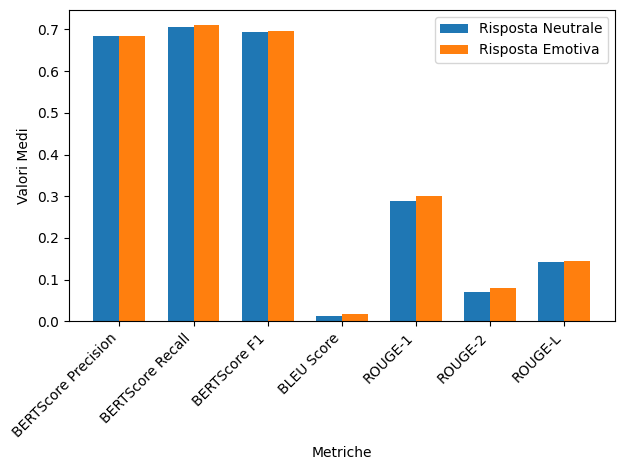

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Inserisci i dati estratti dalle metriche per i prompt neutrali ed emotivi
metrics = ['BERTScore Precision', 'BERTScore Recall', 'BERTScore F1', 'BLEU Score', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']
neutral_means = [
    neutral_metrics['BERTScore Precisione'].mean(),
    neutral_metrics['BERTScore Richiamo'].mean(),
    neutral_metrics['BERTScore F1-score'].mean(),
    neutral_metrics['BLEU Score'].mean(),
    neutral_metrics['ROUGE-1 F1-score'].mean(),
    neutral_metrics['ROUGE-2 F1-score'].mean(),
    neutral_metrics['ROUGE-L F1-score'].mean()
]

emotive_means = [
    emotive_2_metrics['BERTScore Precisione'].mean(),
    emotive_2_metrics['BERTScore Richiamo'].mean(),
    emotive_2_metrics['BERTScore F1-score'].mean(),
    emotive_2_metrics['BLEU Score'].mean(),
    emotive_2_metrics['ROUGE-1 F1-score'].mean(),
    emotive_2_metrics['ROUGE-2 F1-score'].mean(),
    emotive_2_metrics['ROUGE-L F1-score'].mean()
]

# Creazione del grafico a barre
x = np.arange(len(metrics))  # posizioni delle etichette
width = 0.35  # larghezza delle barre

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, neutral_means, width, label='Risposta Neutrale')
bars2 = ax.bar(x + width/2, emotive_means, width, label='Risposta Emotiva')

# Aggiungi etichette e titoli
ax.set_xlabel('Metriche')
ax.set_ylabel('Valori Medi')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha="right")
ax.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_excel("domande-risposte.xlsx")

# Funzione per estrarre i punteggi da una colonna di testo
def extract_scores(score_text):
    pattern = r"BERTScore Precisione: ([0-9.]+)\nBERTScore Richiamo: ([0-9.]+)\nBERTScore F1-score: ([0-9.]+)\nBLEU Score: ([0-9.]+)\nROUGE-1 F1-score: ([0-9.]+)\nROUGE-2 F1-score: ([0-9.]+)\nROUGE-L F1-score: ([0-9.]+)"
    match = re.search(pattern, score_text)
    if match:
        return {
            'BERTScore Precisione': float(match.group(1)),
            'BERTScore Richiamo': float(match.group(2)),
            'BERTScore F1-score': float(match.group(3)),
            'BLEU Score': float(match.group(4)),
            'ROUGE-1 F1-score': float(match.group(5)),
            'ROUGE-2 F1-score': float(match.group(6)),
            'ROUGE-L F1-score': float(match.group(7)),
        }
    return {}

# Estrai le metriche dai prompt neutrali ed emotivi
df['SCORE_NEUTRALE_METRICS'] = df['SCORE NEUTRALE'].apply(extract_scores)
df['SCORE_1_EMOTIVA_METRICS'] = df['SCORE 1 EMOTIVA'].apply(extract_scores)
df['SCORE_2_EMOTIVA_METRICS'] = df['SCORE 2 EMOTIVA'].apply(extract_scores)

# Crea DataFrame separati per le metriche
neutral_metrics = pd.DataFrame(df['SCORE_NEUTRALE_METRICS'].tolist())
emotive_2_metrics = pd.DataFrame(df['SCORE_2_EMOTIVA_METRICS'].tolist())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Inserisci i dati estratti dalle metriche per i prompt neutrali ed emotivi
metrics = ['BERTScore Precision', 'BERTScore Recall', 'BERTScore F1', 'BLEU Score', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']
neutral_means = [
    neutral_metrics['BERTScore Precisione'].mean(),
    neutral_metrics['BERTScore Richiamo'].mean(),
    neutral_metrics['BERTScore F1-score'].mean(),
    neutral_metrics['BLEU Score'].mean(),
    neutral_metrics['ROUGE-1 F1-score'].mean(),
    neutral_metrics['ROUGE-2 F1-score'].mean(),
    neutral_metrics['ROUGE-L F1-score'].mean()
]

emotive_means = [
    emotive_2_metrics['BERTScore Precisione'].mean(),
    emotive_2_metrics['BERTScore Richiamo'].mean(),
    emotive_2_metrics['BERTScore F1-score'].mean(),
    emotive_2_metrics['BLEU Score'].mean(),
    emotive_2_metrics['ROUGE-1 F1-score'].mean(),
    emotive_2_metrics['ROUGE-2 F1-score'].mean(),
    emotive_2_metrics['ROUGE-L F1-score'].mean()
]

# Creazione del grafico a barre
x = np.arange(len(metrics))  # posizioni delle etichette
width = 0.35  # larghezza delle barre

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, neutral_means, width, label='Neutral')
bars2 = ax.bar(x + width/2, emotive_means, width, label='Emotive')

# Aggiungi etichette e titoli
ax.set_xlabel('Metrics')
ax.set_ylabel('Average Values')
ax.set_title('Comparison of Neutral vs Emotive Prompts Across Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha="right")
ax.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()


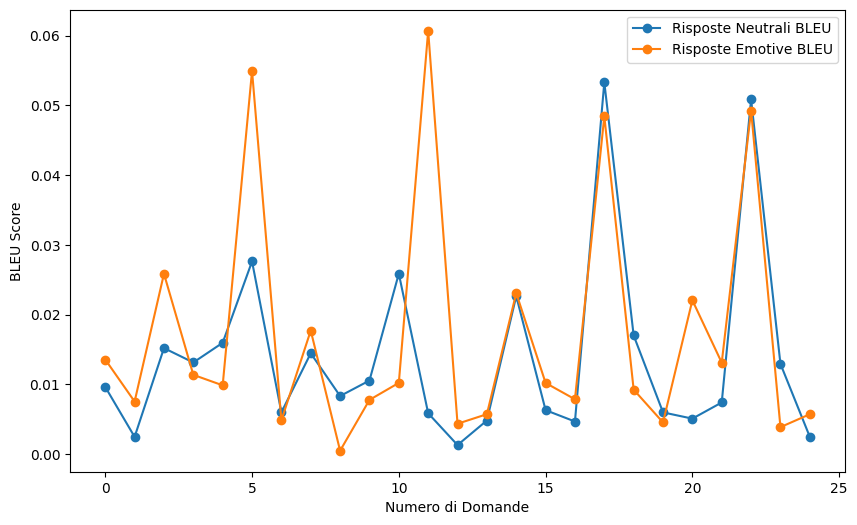

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(neutral_metrics['BLEU Score'], label='Risposte Neutrali BLEU', marker='o')
plt.plot(emotive_2_metrics['BLEU Score'], label='Risposte Emotive BLEU', marker='o')
plt.xlabel('Numero di Domande')
plt.ylabel('BLEU Score')
plt.legend()
plt.show()


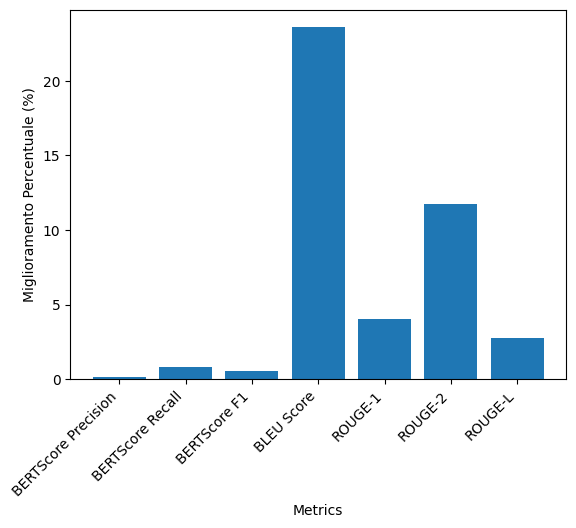

In [ ]:
def calculate_percentage_improvement(neutral, emotional):
    return (emotional - neutral) / neutral * 100

improvements = [
    calculate_percentage_improvement(neutral_metrics['BERTScore Precisione'].mean(), emotive_2_metrics['BERTScore Precisione'].mean()),
    calculate_percentage_improvement(neutral_metrics['BERTScore Richiamo'].mean(), emotive_2_metrics['BERTScore Richiamo'].mean()),
    calculate_percentage_improvement(neutral_metrics['BERTScore F1-score'].mean(), emotive_2_metrics['BERTScore F1-score'].mean()),
    calculate_percentage_improvement(neutral_metrics['BLEU Score'].mean(), emotive_2_metrics['BLEU Score'].mean()),
    calculate_percentage_improvement(neutral_metrics['ROUGE-1 F1-score'].mean(), emotive_2_metrics['ROUGE-1 F1-score'].mean()),
    calculate_percentage_improvement(neutral_metrics['ROUGE-2 F1-score'].mean(), emotive_2_metrics['ROUGE-2 F1-score'].mean()),
    calculate_percentage_improvement(neutral_metrics['ROUGE-L F1-score'].mean(), emotive_2_metrics['ROUGE-L F1-score'].mean())
]

plt.bar(metrics, improvements)
plt.xlabel('Metrics')
plt.ylabel('Miglioramento Percentuale (%)')
plt.xticks(rotation=45, ha='right')
plt.show()


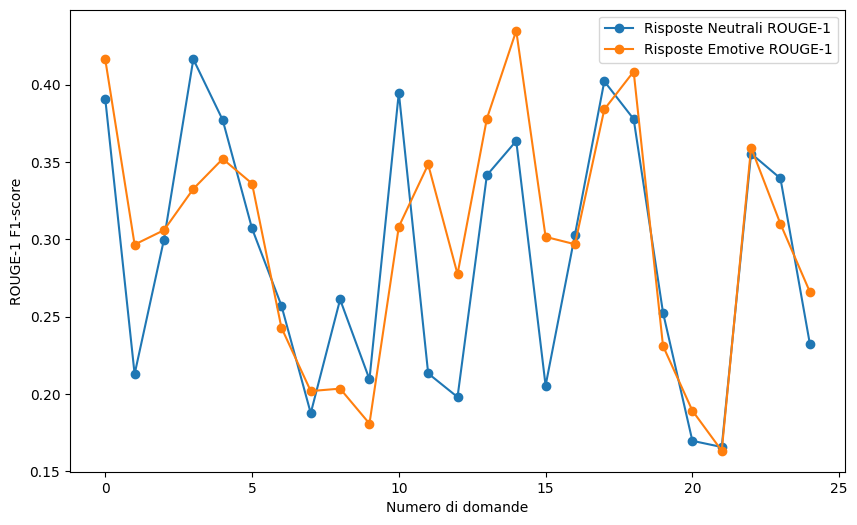

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(neutral_metrics['ROUGE-1 F1-score'], label='Risposte Neutrali ROUGE-1', marker='o')
plt.plot(emotive_2_metrics['ROUGE-1 F1-score'], label='Risposte Emotive ROUGE-1', marker='o')
plt.xlabel('Numero di domande')
plt.ylabel('ROUGE-1 F1-score')

plt.legend()
plt.show()


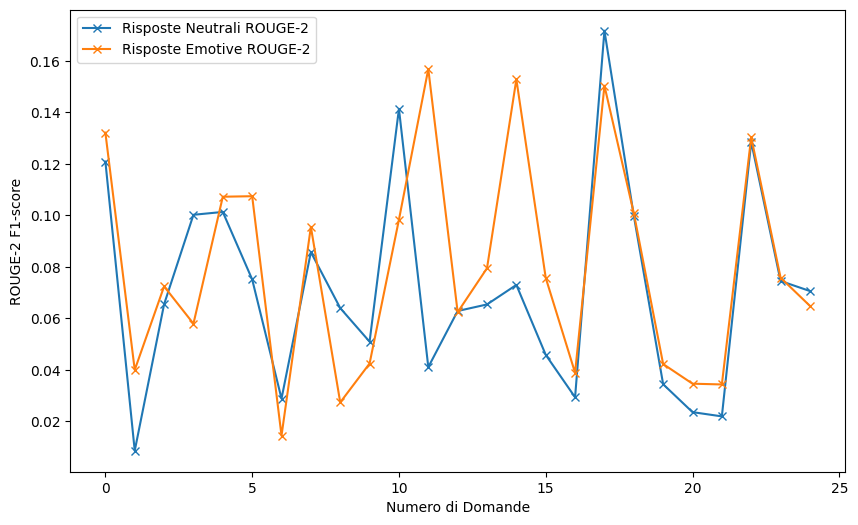

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(neutral_metrics['ROUGE-2 F1-score'], label='Risposte Neutrali ROUGE-2', marker='x')
plt.plot(emotive_2_metrics['ROUGE-2 F1-score'], label='Risposte Emotive ROUGE-2', marker='x')
plt.xlabel('Numero di Domande')
plt.ylabel('ROUGE-2 F1-score')
plt.legend()
plt.show()


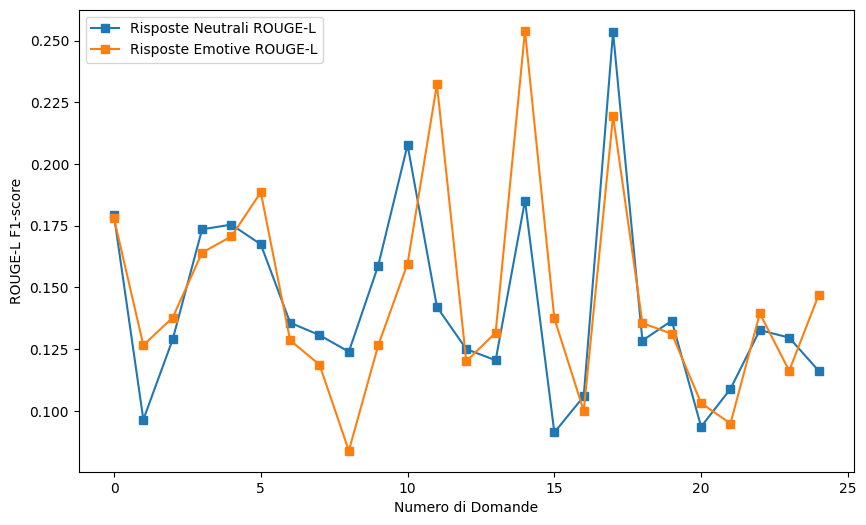

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(neutral_metrics['ROUGE-L F1-score'], label='Risposte Neutrali ROUGE-L', marker='s')
plt.plot(emotive_2_metrics['ROUGE-L F1-score'], label='Risposte Emotive ROUGE-L', marker='s')
plt.xlabel('Numero di Domande')
plt.ylabel('ROUGE-L F1-score')

plt.legend()
plt.show()


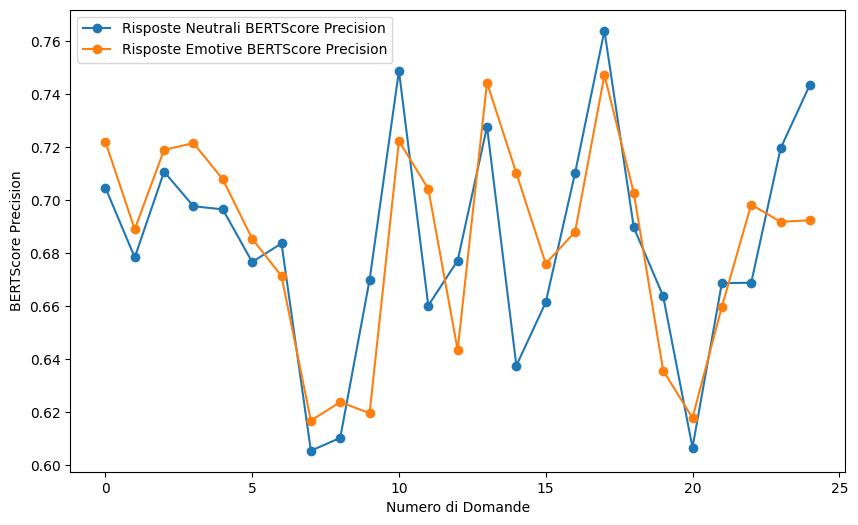

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(neutral_metrics['BERTScore Precisione'], label='Risposte Neutrali BERTScore Precision', marker='o')
plt.plot(emotive_2_metrics['BERTScore Precisione'], label='Risposte Emotive BERTScore Precision', marker='o')
plt.xlabel('Numero di Domande')
plt.ylabel('BERTScore Precision')

plt.legend()
plt.show()


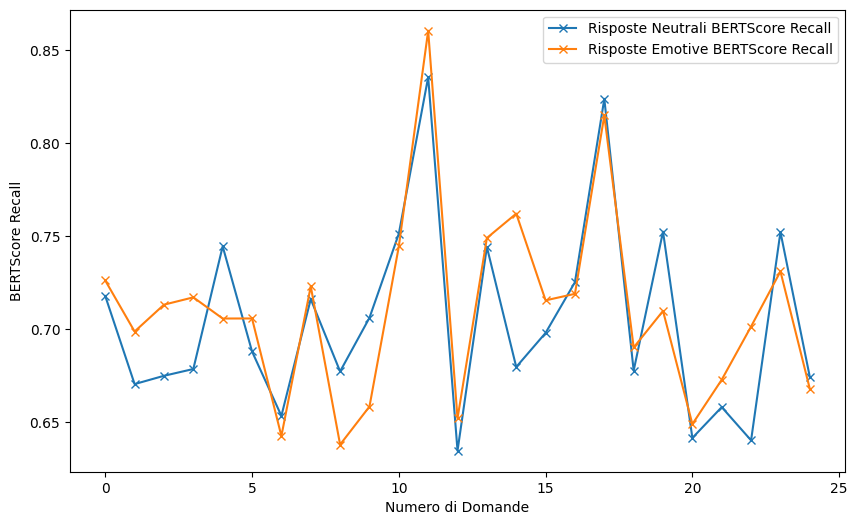

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(neutral_metrics['BERTScore Richiamo'], label='Risposte Neutrali BERTScore Recall', marker='x')
plt.plot(emotive_2_metrics['BERTScore Richiamo'], label='Risposte Emotive BERTScore Recall', marker='x')
plt.xlabel('Numero di Domande')
plt.ylabel('BERTScore Recall')

plt.legend()
plt.show()


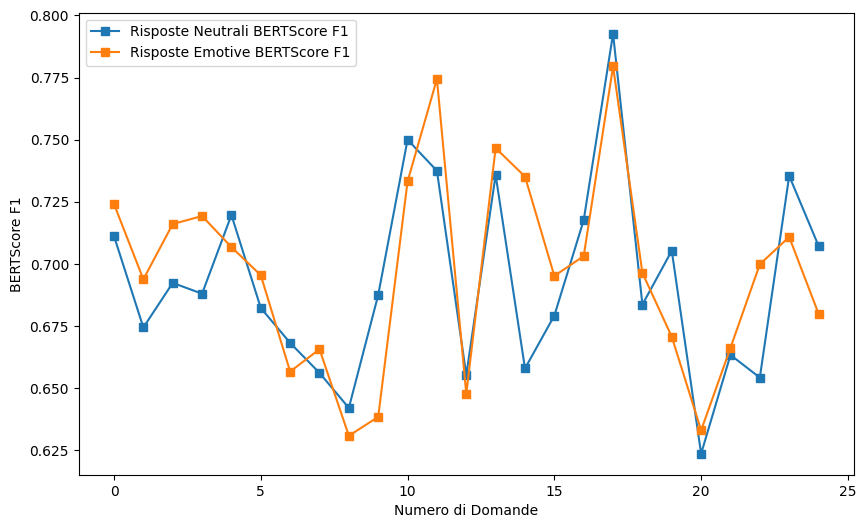

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(neutral_metrics['BERTScore F1-score'], label='Risposte Neutrali BERTScore F1', marker='s')
plt.plot(emotive_2_metrics['BERTScore F1-score'], label='Risposte Emotive BERTScore F1', marker='s')
plt.xlabel('Numero di Domande')
plt.ylabel('BERTScore F1')

plt.legend()
plt.show()
